In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
len(train_df)

891

Going into this project, we will be trying to predict whether or not passengers on the titanic survived or not based on various features. The data has already been split up for us on this page on Kaggle <https://www.kaggle.com/competitions/titanic/data> so we will not need to grab train test split. At the beginning, I can see various arguments for why different features might be important to whether or not a passenger survived. Age and sex I believe will be big factors, as we are all famous with the exhortation to get the "women and children" on the lifeboats first. Beyond that though, I believe that passenger class may have a big factor as higher class passengers may have gotten better treatment from those coordinating life boats. Furthermore, Cabin could be largely indicative as folks with cabins further in the hull may have gotten stuck (as Jack and Rose did for a time). Time to see

In [5]:
test_df = pd.read_csv("test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
len(test_df)

418

Now let's decide what we want to do about these NaN values. For age and fare, I think that filling with the mean is a good strategy to start with. For cabin however, this seems to me like there are too many NaN to make a good fill. Because of that, I think that dropping this column entirely from both of our datasets makes sense.

In [8]:
train_df = train_df.drop("Cabin", axis=1)
test_df = test_df.drop("Cabin", axis=1)

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [11]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
train_df.Age.mean()

29.69911764705882

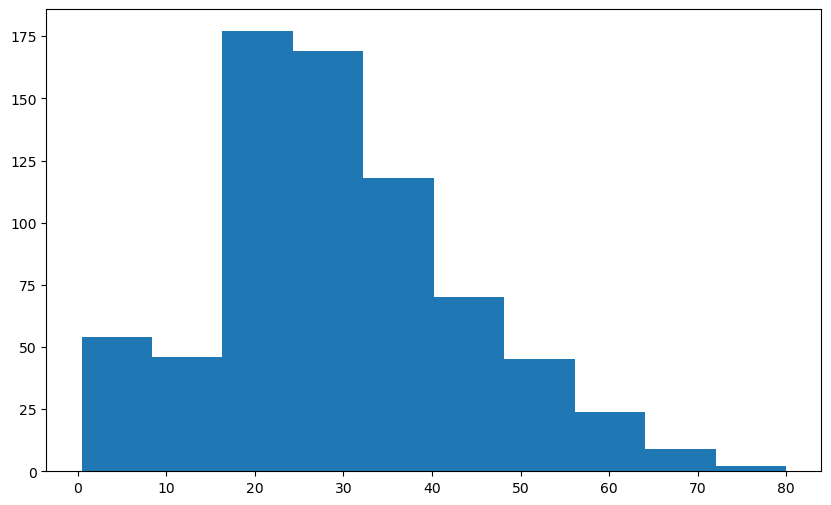

In [13]:
plt.figure(1,figsize=(10,6))
plt.hist(train_df.Age)
plt.show()

Upon further reflection, the mean that we found seems a little low so I'm going to fill the blank age values with a slightly inflated number

In [14]:
train_df.Age = train_df.Age.fillna(train_df.Age.mean()+5)

We need to separate our target variable from our features now. Let's do this for both of our datasets so that we don't have to think about this later. I'm going to use naming conventions borrowed from train_test_split practices because those are most familiar to me

We also need to fill two empty "Embarked" values. For this, we will use the mode of the column

In [15]:
train_df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [16]:
train_df.Embarked = train_df.Embarked.fillna("S")

In [17]:
train_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now it's time to take a look at the test data and fill out any troubling values there

In [18]:
test_df.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [19]:
test_df.Age.mean()

30.272590361445783

I actually think that it might make more sense for me to fill the test dataset with the same mean as as I did the training dataset rather than use a slightly different mean. The difference might not be huge, but this feels more consistent. I'd be interested in knowing what you think of this practice

In [20]:
test_df.Age = test_df.Age.fillna(train_df.Age.mean()+5)

In [21]:
test_df.Fare = test_df.Fare.fillna(test_df.Fare.mean())

In [22]:
test_df.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Now we have all of our data filled in. Let's check for any outliers

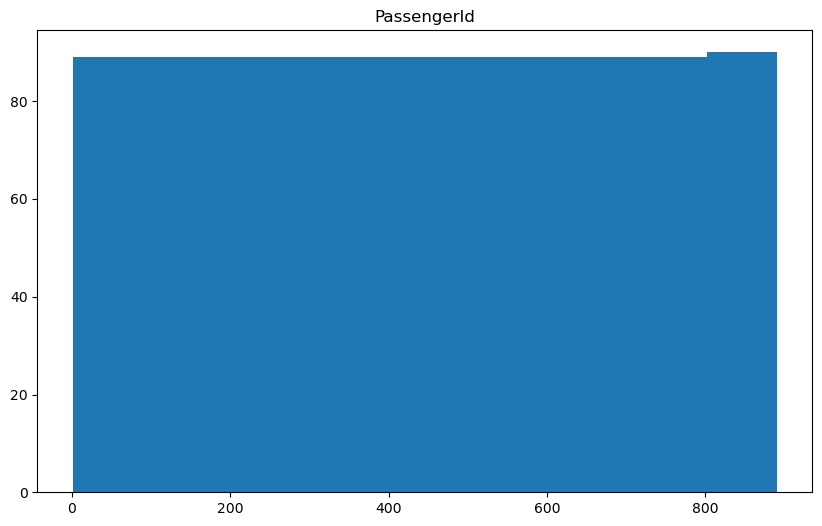

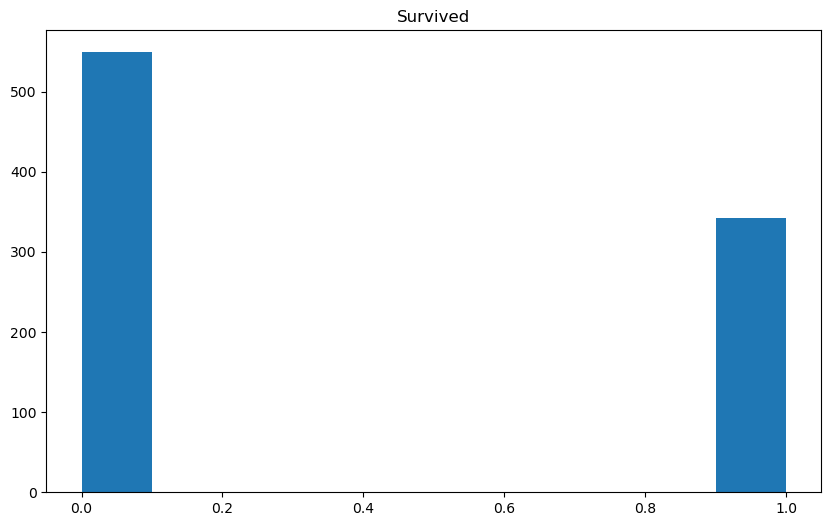

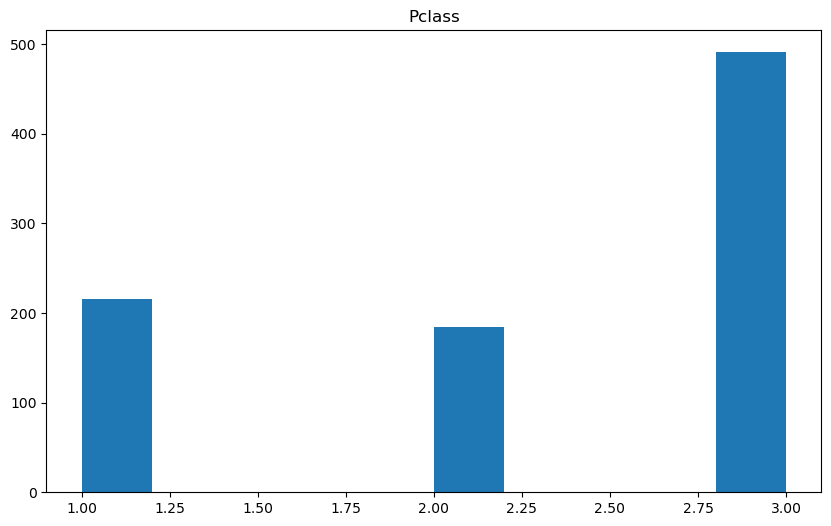

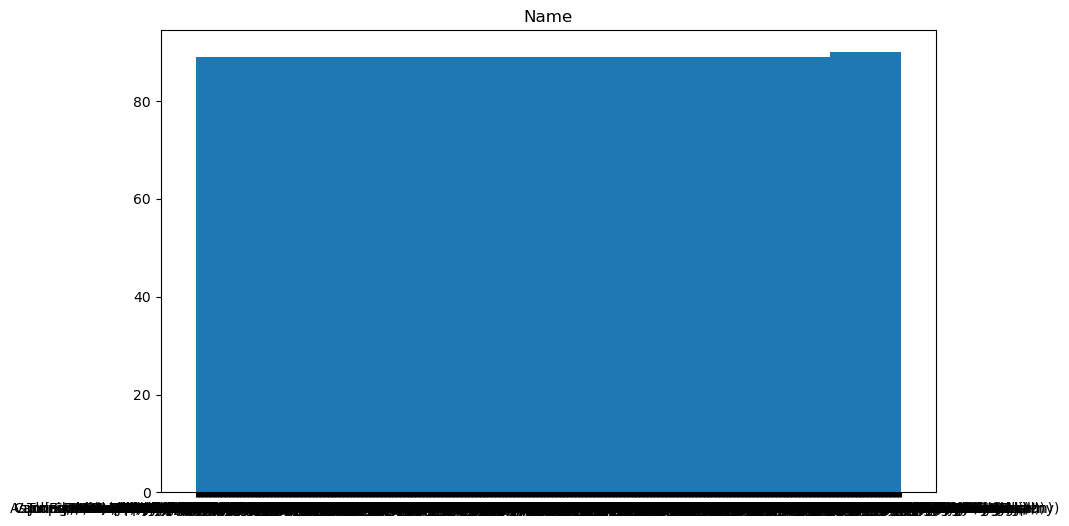

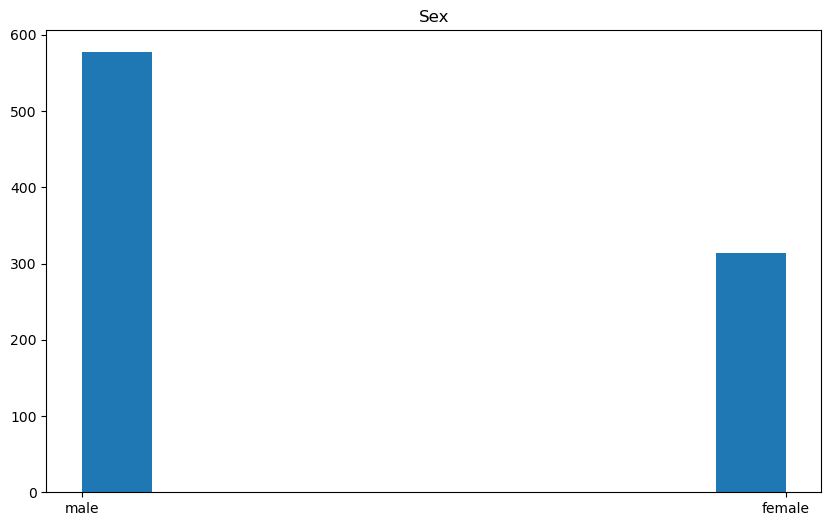

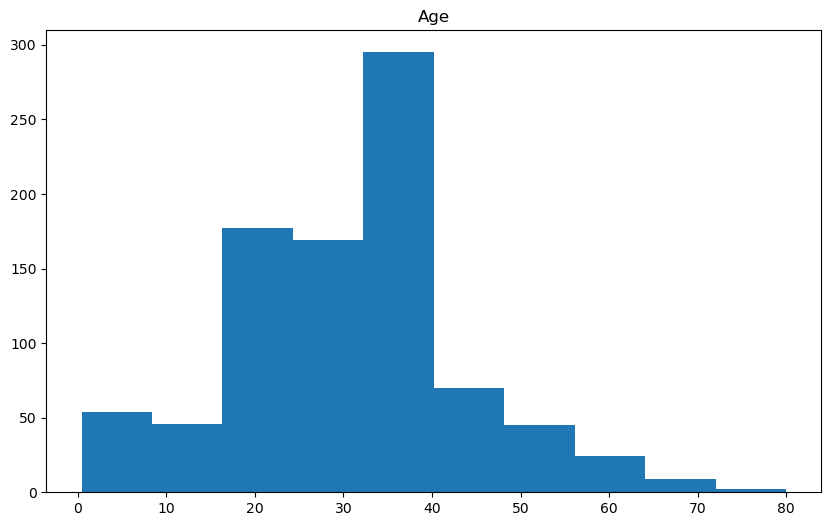

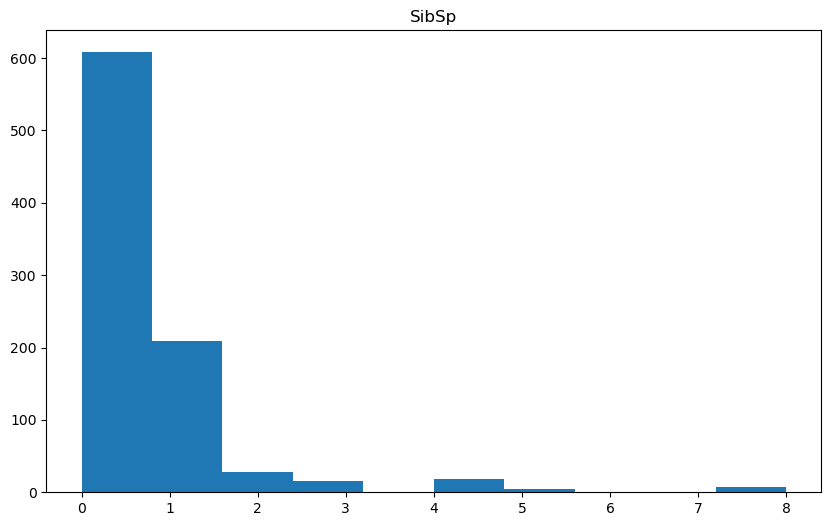

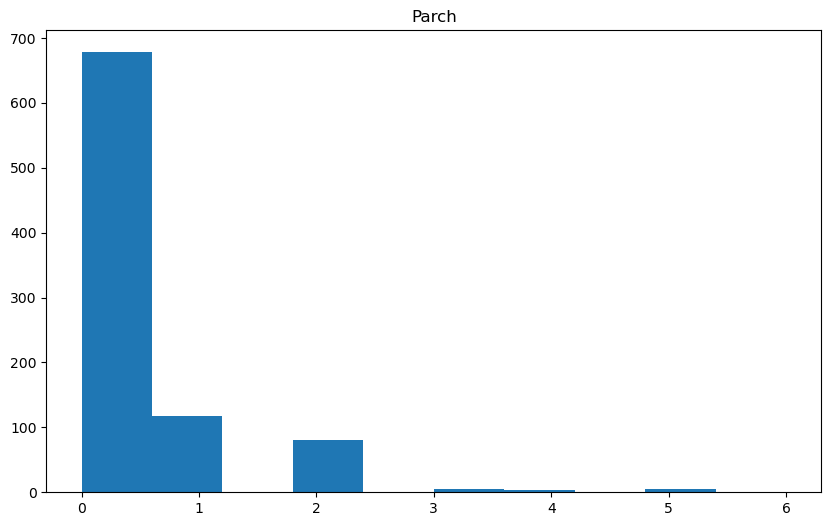

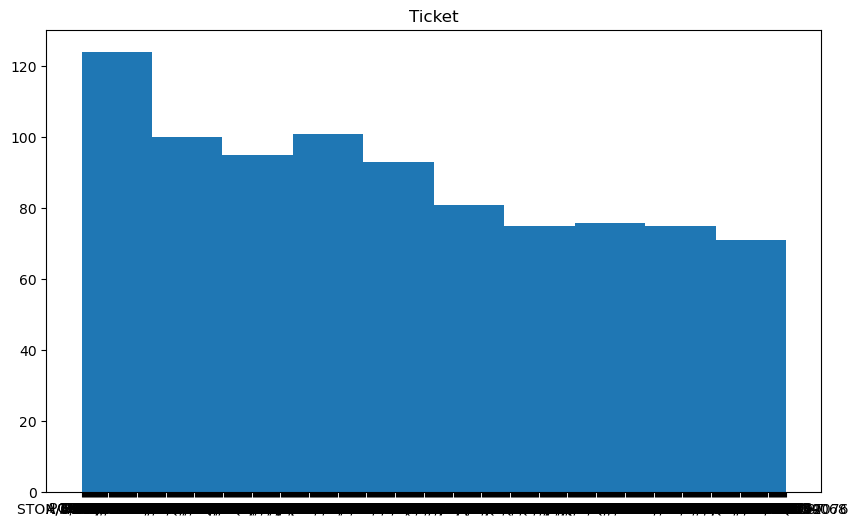

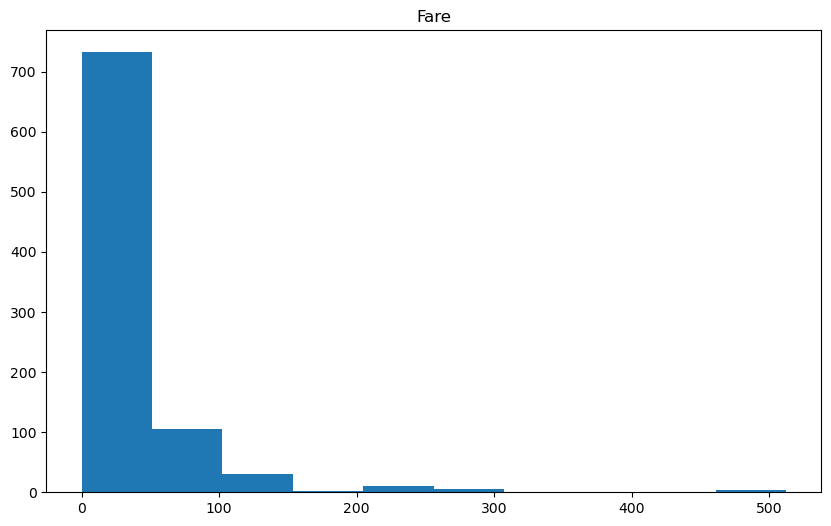

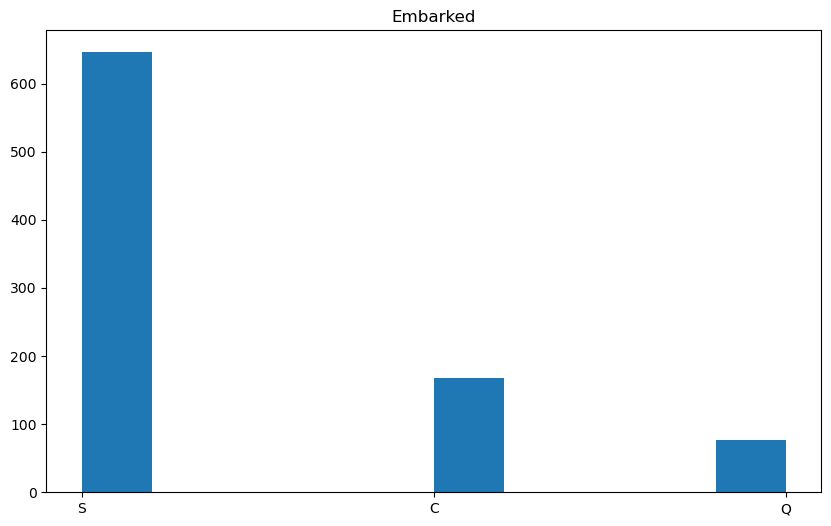

In [23]:
for column in train_df.columns:
    plt.figure(figsize=(10,6))
    plt.hist(train_df[column])
    plt.title(column)
    plt.show()

There appear to be some outliers in SibSp and fares so let's drop the maxes and see if that evens things out a bit

In [24]:
train_df.Fare.max()

512.3292

In [25]:
fares = train_df.Fare.value_counts()

In [26]:
fares.loc[train_df.Fare.max()]

3

In [27]:
for i in range(3):
    train_df = train_df.drop(train_df.Fare.idxmax())

In [28]:
train_df.Fare.max()

263.0

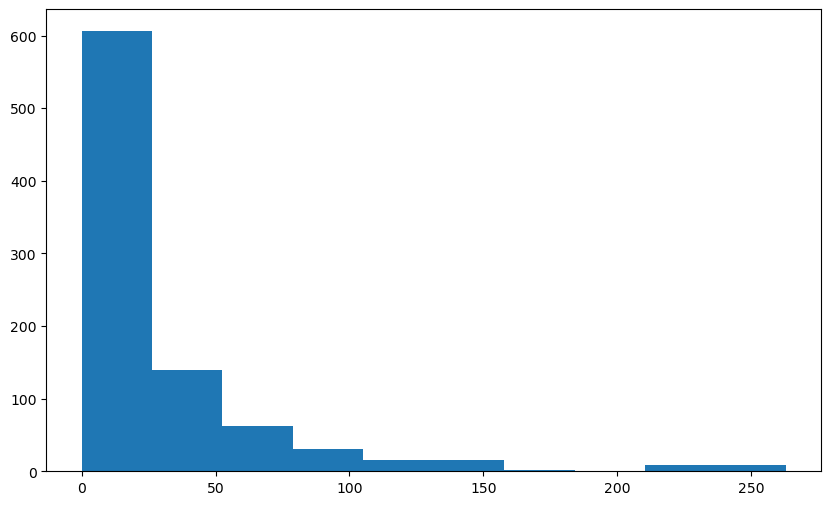

In [29]:
plt.figure(figsize=(10,6))
plt.hist(train_df.Fare)
plt.show()

That seems to have taken care of the biggest outlier. There are some others which would skew the mean but there are enough of them that I think we should leave them for now.

In [30]:
sibSpMax = train_df.SibSp.max()
sibSpMax

8

In [31]:
sibSp_Count = train_df.SibSp.value_counts()
sibSp_Count.loc[sibSpMax]

7

In [32]:
for i in range(sibSp_Count.loc[sibSpMax]):
    train_df.drop(train_df.SibSp.idxmax(), inplace=True)

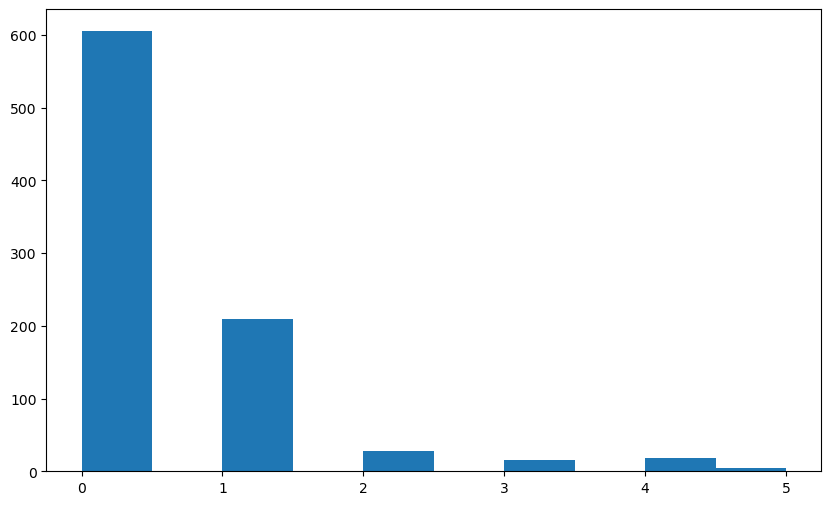

In [33]:
plt.figure(2, figsize = (10,6))
plt.hist(train_df.SibSp)
plt.show()

Great, now that we've cleaned up our training data, we're ready to go. We could try to clean the test data too in the way that we did above, but then that would affect the final submission because we would be changing the amount of rows that we submit. Let's move on

In [34]:
X_train = train_df.drop(["Survived","Name","Ticket"], axis=1)
X_test = test_df.drop(["Name","Ticket"], axis =1)
y_train = train_df["Survived"]

In [35]:
X_train.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [36]:
X_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [37]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [38]:
X_train = pd.get_dummies(X_train, columns=["Sex","Embarked"], dtype=int)

In [39]:
X_test = pd.get_dummies(X_test, columns=["Sex","Embarked"], dtype=int)

I've done some preprocessing to get the data in a format that I need. After doing a little bit of research, I want to try a random forest classifier for this project to see how well it does. The dataset that I'm able to download from Kaggle doesn't have the outcomes for the test passengers so we are forced to submit our predictions for passengers in X_test with only the passenger ID and whether or not we think that they survived

In [40]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=1)

In [41]:
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [42]:
predictions = clf.predict(X_test)

In [43]:
X_test["Survived"] = predictions
X_test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0
1,893,3,47.0,1,0,7.0000,1,0,0,0,1,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0
3,895,3,27.0,0,0,8.6625,0,1,0,0,1,1
4,896,3,22.0,1,1,12.2875,1,0,0,0,1,0


In [44]:
output = X_test.drop(["Pclass","Age","SibSp","Parch","Fare","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"],axis=1)

In [45]:
output.to_csv("submission.csv",index=False)

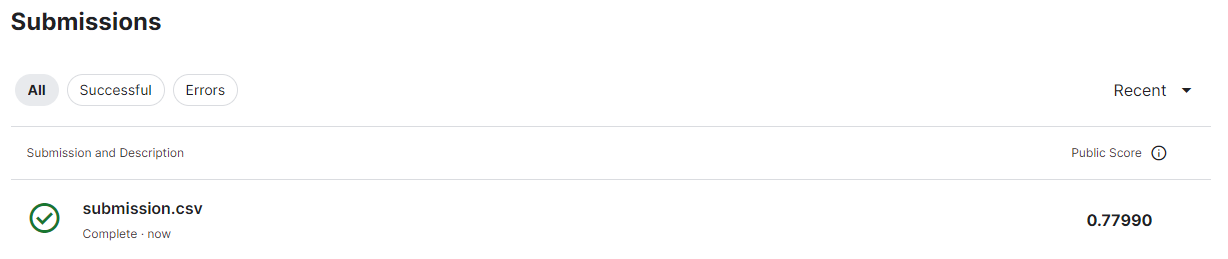

In case the emage doesn't show for some reason, my public score on the classifier was a 77.99% which might not be the 100% others have achieved but I'm pretty happy with that right now

Finally, I want to inspect feature importance to see how my predictions above fared.

In [49]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    clf, X_train, y_train, n_repeats=10, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=X_train.columns)

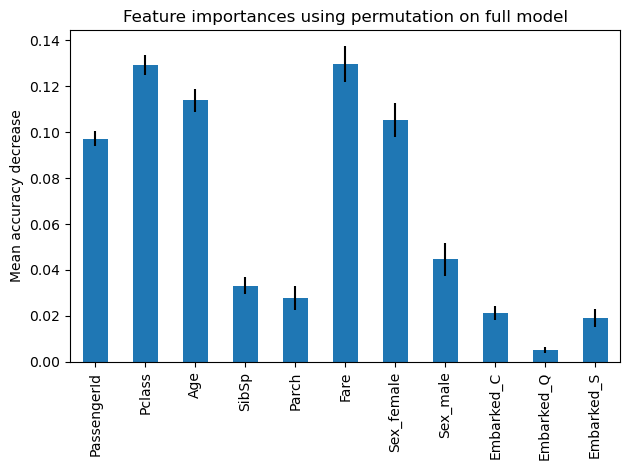

In [50]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()